# 作业: 逻辑回归

## 作业要求：

用numpy实现Logistic Regression类（补充cell 1中定义的LogisticRegression类），用梯度下降法训练

1. 包括类的方法 loss = fit(X,Y) 函数，用于训练；输入：X为N * d维的训练数据，N为训练样本数，d为数据的维数；Y为N*1维的训练数据真实类别号；输出：loss为列表，包括每轮的损失函数值。

2. 包括类的方法 y_pred, y_pred_label = predict(X) 函数，用于测试；输入： X为N * d维的测试数据， N为测试样本数；输出：y_pred维数为N * 1，为模型的预测（回归）值；y_pred_label维数为N * 1，为根据回归值得到的预测类别号

3. 补充plotDecisioinBoundary函数，使其能够使用等高线图(contour）绘制出Logistic Regression模型的分类面。

In [28]:
import numpy as np


class LogisticRegression(object):
	def __init__(self, dim, learning_rate=0.01, max_iter=100, seed=None):
		np.random.seed(seed)
		self.dim = dim
		self.lr = learning_rate
		self.max_iter = max_iter  # 定义学习率和训练轮数
		self.W = np.random.randn(dim+1, 1)
		print(self.W)
		# self.W = np.random.normal(1, 0.1, [dim+1, 1])
# 可在此处补充类的属性


	def fit(self, X, Y):
		# 请在此处补充类的方法：训练函数，返回每轮loss的列表
		loss = []
		pw = [self.W]
		X_ = np.hstack([X, np.ones((X.shape[0], 1))])  # 在X后面添加一列1
		for i in range(self.max_iter):
			self.__train_step(X_, Y)
			Y_pred,_ = self.predict(X)
			loss.append(self.loss(Y, Y_pred))
			pw.append(self.W)
		return loss,pw


	def __train_step(self, X, Y):
		P = self.__get_P(X, self.W)
		dW = self.__get_grad(X, Y, P)
		self.W -= self.lr * dW


	def __get_grad(self,X, Y, P):
		N = X.shape[0]
		dW = X.T.dot(P - Y) / N
		return dW


	def __get_P(self,X, W):
		# 请在此处补充类的方法：计算P
		P = 1 / (1 + np.exp(-X.dot(W)))
		return P


	def predict(self, X):
		# 请在此处补充类的方法：测试函数，返回对应X的预测值和预测类别列表
		X = np.hstack([X, np.ones((X.shape[0], 1))])  # 在X后面添加一列1
		Y_pred = self.__get_P(X, self.W)
		Y_pred_label = np.where(Y_pred < 0.5, 0, 1)
		return Y_pred, Y_pred_label

	def loss(self, Y, Y_pred):
		loss = -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
		return loss


In [29]:
import matplotlib.pyplot as plt


def plotData(X, Y):
	"""
    使用红色+号表示正例，蓝色圆点表示负例，绘制数据集中正负例的分布情况
    """
	plt.figure()
	pos_idx = (Y == 1)
	# size m,1
	pos_idx = pos_idx[:, 0]
	# size m, 这时才可用来索引某[一]个维度
	neg_idx = (Y == 0)
	neg_idx = neg_idx[:, 0]

	plt.plot(X[pos_idx, 0], X[pos_idx, 1], 'r+')
	plt.plot(X[neg_idx, 0], X[neg_idx, 1], 'bo')




def plotDecisioinBoundary(X, Y, regr):
	"""
    在正负例分布图上进一步绘制出模型regr的分类界面
    """
	# 先绘制正负例分布情况
	plotData(X, Y)

	# 绘制等高线图，在水平和垂直方向均有50个点
	plot_num = 50;
	plot_num_2D = plot_num ** 2;

	# 准备网格
	x_plot = np.linspace(start=X[:, 0].min(), stop=X[:, 0].max(), num=plot_num)
	y_plot = np.linspace(start=X[:, 1].min(), stop=X[:, 1].max(), num=plot_num)
	X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
	# print(X_plot)
	# print(X_plot.shape)
	# 请在此补充代码，计算regr模型在各个格点的预测概率，并构成一个形状和格点相同的P_matrix数组，绘制等高线图
	tempX = np.c_[X_plot.ravel(), Y_plot.ravel()]
	# tempX = np.hstack([tempX, np.ones((tempX.shape[0], 1))])
	P_matrix, _ = regr.predict(tempX)
	P_matrix.resize(X_plot.shape)
	# 补充代码结束
	plt.contour(X_plot, Y_plot, P_matrix, np.array([0.5]))


def test(y_pred, y_true):
	true = 0.
	for j in range(y_pred.shape[0]):
		if y_true[j] == y_pred[j]:
			true += 1
	acc = true / y_pred.shape[0]
	return acc

[[-0.52944401]
 [-2.98741531]
 [-0.73730359]]
[[-0.94630421]
 [ 0.45543873]
 [-0.87034925]]


C:\Users\ZnH2\AppData\Local\Temp\ipykernel_32848\3010216265.py:55: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))


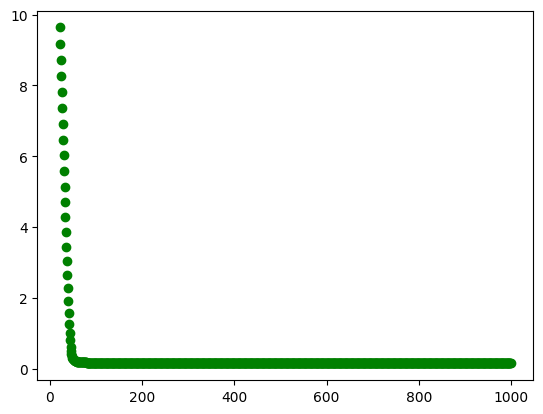

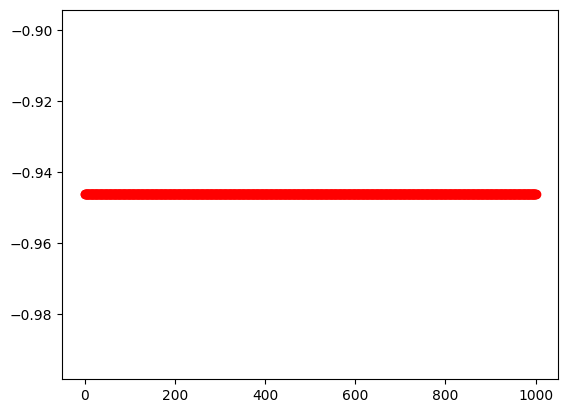

测试集上正确率:0.95


<Figure size 640x480 with 0 Axes>

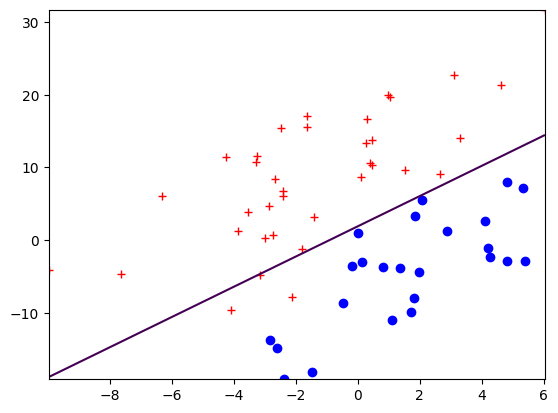

In [30]:
# 导入测试数据
import csv
seed = 210404
data_1 = np.load('data_for_logistic_regression_1.npz')
x_train = data_1['x_train']
y_train = data_1['y_train']
x_test = data_1['x_test']
y_test = data_1['y_test']
dim = x_train.shape[1]

# 训练逻辑回归模型
max_iter = 1000
regr = LogisticRegression(dim, learning_rate=0.01, max_iter=max_iter, seed=seed)
loss, dw = regr.fit(x_train, y_train)
print(regr.W)
# 打印损失
plt.figure()
plt.scatter(np.arange(len(loss)), loss, marker='o', c='green')
plt.show()

plt.figure()
plt.scatter(np.arange(len(dw)), [x[0] for x in dw], marker='o', c='red')
# plt.ylim(-1.11, -1.14)
with open(f"output_{str(max_iter)}.csv","w",newline='') as f:
	writer = csv.writer(f)
	writer.writerows(dw)

plt.show()
# 显示测试集中的分类界面
plt.figure()
plotDecisioinBoundary(x_test, y_test, regr)

y_pred, y_pred_label = regr.predict(x_test)
acc = test(y_pred_label, y_test)
print('测试集上正确率:{}'.format(acc))